In [1]:
import bagpy
from typing import *
from os.path import join, exists
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def get_results_from_folder(folder: str) -> Dict[str, Tuple[List[float], List[float]]]:
    utn_path = join(folder, "UTN")
    maryland_path = join(folder, "MARYLAND")
    if not exists(utn_path) or not exists(maryland_path):
        print(f"Skipping {folder} because of not having both maryland and UTN")
        return None
    utn_bag_file = glob(join(utn_path, "*.bag.active"))[0]
    maryland_bag_file = glob(join(maryland_path, "*.bag.active"))[0]
    reader_utn = bagpy.bagreader(utn_bag_file)
    reader_maryland = bagpy.bagreader(maryland_bag_file)
    
    def get_times_and_explores(reader: bagpy.bagreader) -> Tuple[List[float], List[float]]:
        amt_of_non_unknown = []
        timestamps = []
        img_data =  reader.reader.read_messages("/map")
        i = 0
        for d in img_data:
            img = np.asarray(d.message.data)
            amt_of_non_unknown.append(np.count_nonzero(img != -1))
            timestamps.append(d.timestamp.to_sec())
        timestamps = [t - timestamps[0] for t in timestamps]
        amt_of_non_unknown = [0.0025 * item for item in amt_of_non_unknown]
        return (timestamps, amt_of_non_unknown)
    res = {"UTN": get_times_and_explores(reader_utn), "MARYLAND": get_times_and_explores(reader_maryland)}
    return res

In [9]:
res = get_results_from_folder("/home/ramiro/Frontier-Exploration-with-a-prior/src/ROS/create_autonomy/outputs/test_3")

[INFO]  Data folder /home/ramiro/Frontier-Exploration-with-a-prior/src/ROS/create_autonomy/outputs/test_3/UTN/2022-10-14-04-06-33.bag.ac already exists. Not creating.
[INFO]  Data folder /home/ramiro/Frontier-Exploration-with-a-prior/src/ROS/create_autonomy/outputs/test_3/MARYLAND/2022-10-14-04-06-08.bag.ac already exists. Not creating.


In [10]:
def plot_result(res: Dict):
    plt.plot(res["UTN"][0], res["UTN"][1], label="UTN")
    plt.plot(res["MARYLAND"][0], res["MARYLAND"][1], label="MARYLAND")
    plt.legend()

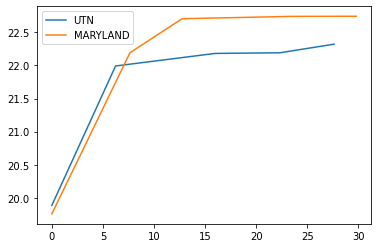

In [11]:

plot_result(res)

[INFO]  Successfully created the data folder /home/ramiro/Frontier-Exploration-with-a-prior/src/ROS/create_autonomy/outputs/test_1/UTN/2022-10-14-03-50-58.bag.ac.
